# Human Activity Recognition Using Smartphones Dataset Classification

## Abstract:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. *The objective is to classify activities into one of the six activities performed*.

## Problem Definition:

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

#### <u>For each record it is provided:</u> 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.

#### <u>The dataset includes the following files:</u>
- 'features_info.txt': Shows information about the variables used on the feature vector.
- 'features.txt': List of all features.
- 'activity_labels.txt': Links the class labels with their activity name.
- 'train.csv': Training set.
- 'test.csv': Test set.

#### <u>Notes:</u>
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/sec<sup>2</sup>).
- The gyroscope units are rad/sec.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

### <u><a href="#Data-Preprocessing-(preparing-data):">Data Preprocessing:<a></u>
We are going to classify this data according to the 6 activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING). **In order to do this we have to prepare the data first:**
- Read activity labels identifiers from "activity_labels.txt".
- Read training data "train.csv".
- Get the features (561 features) in a separate array (X) without subject column (identifies who performed the activit) or the labels.
- Make sure that the features data type to be float.
- Make sure that the labels data type to be integer.
- Get the labels (target vector) in a separate array (t).
- Replace the labels with thier identifiers.
- Repeate the same procedure of traning on the testing data, Test file "test.csv", Arrays X_test and y_actual.
    
### <u><a href="#Dimensionality-Reduction">Dimensionality Reduction Using PCA (Principal Component Analysis):<a></u>
It is an important machine learning method for dimensionality reduction that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.
PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.
- We provided 2 cases and compared their results:

    1. A PCA that will retain 95% of the variance.
    2. A PCA that will retain 90% of the variance.

### <u><a href="#Classification-Process-(using-the-4-classifiers):">Classification Process:</a></u>
Now our data is ready for the classification. It is a great chance to exeperiment 2 types of classifiers that we have built them from scratch and compare their results with the same classifiers from the well knowen package `sci-kit learn "sklearn"`.

#### The used classifiers in this project are:
- K-Neighbors Classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn KNeighborsClassifier</a>).
- K-Nearest Keigbors Classifier (<a href="#K-Nearest-Keigbors-Classifier-(from-scratch)">KNN from scratch</a>).
- Naive Bayes (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">sklearn GaussianNB</a>)
- Gaussian Naive Bayes Classifier (<a href="#Gaussian-Naive-Bayes-Classifier-(from-scratch)">GaussianNB from scratch</a>)
- Perceptron Classifier (<a href="#Perceptron-Classifier-(Perceptron)">Perceptron Classifier</a>)
- Perceptron Classifier (<a href="#Perceptron-(from-scratch)">Perceptron Classifier from scratch</a>)
- Multi-layer Perceptron Classifier (<a href="#Multi-layer-Perceptron-Classifier-(-MLPClassifier-)">MLPClassifier</a>)
- Random Forest Classifier (<a href="#Random-Forest-Classifier-(-RandomForestClassifier-)">RandomForestClassifier</a>)
- Support Vector Classification (<a href="#Support-Vector-Classification-(-SVC-)">SVC</a>)

## Sources:
- https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones
- https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

## Data Preprocessing (preparing data):

In [38]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import datetime

### Training Data

In [4]:
#Labels are the six possible activities for our project 
#(1 'WALKING', 2 'WALKING_UPSTAIRS', 3 'WALKING_DOWNSTAIRS', 4 'SITTING', 5 'STANDING', 6 'LAYING')
Labels = np.array(pd.read_csv('activity_labels.txt', sep=' ', header=None)) # (6, 2)


# Reading the Training Data (7352, 563)
PD_Data = pd.read_csv('train.csv')
Data = np.array(PD_Data)

# Get the features in a separate array (X) without subject column or the labels.
# Make sure that the features data type to be float.
X = Data[:,0:-2].astype(float) #(7352, 561)

# Get the labels (target vector) in a separate array (t).
t = Data[:,-1] #(7352,)

# Replace the labels with thier identifiers.
for i, c in Labels:
    t = np.array([i if j == c else j for j in t])

# Make sure that the labels data type to be integer.
t = np.array(t ,dtype=int) # (7352,)

In [3]:
X.shape

(7352, 561)

### Testing Data

In [7]:
# Reading the Testing Data.
Data_test = np.array(pd.read_csv('test.csv')) #(2947, 563)

# Get the features in a separate array (X) without subject column or the labels.
# Make sure that the features data type to be float.
X_test = Data_test[:,0:-2].astype(float) # (2947, 561)

# Get the labels in a separate array (y_actual).
y_actual = Data_test[:,-1]

# Replace the labels with thier identifiers.
# Changing y_actual data to use the numeric value of the label instead of the activity test.
for i, c in Labels:
    y_actual = np.array([i if j == c else j for j in y_actual])

# Make sure that the labels data type to be integer.
y_actual = np.array(y_actual, dtype=int)

In [5]:
X_test.shape

(2947, 561)

## Dimensionality Reduction

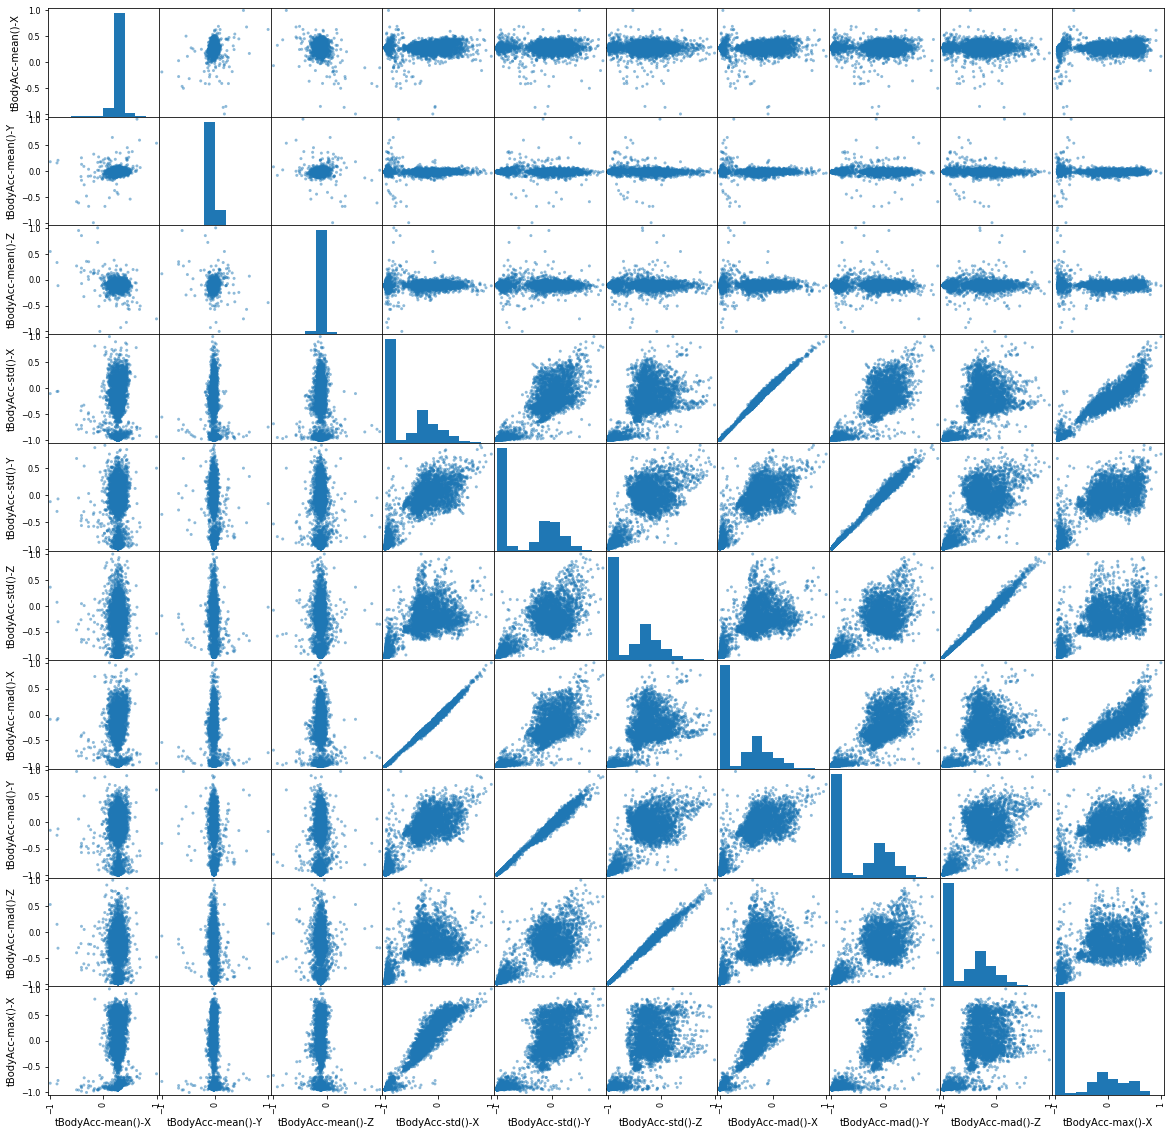

In [31]:
# Plotting only the first 10 features
pd.plotting.scatter_matrix(PD_Data.iloc[:,0:10], figsize=(20, 20))
plt.show()

# It is shown here a lot of correlated features, so we will apply Dimensions reductions.

### Training Data

Best number of components (features) after reduction :  67


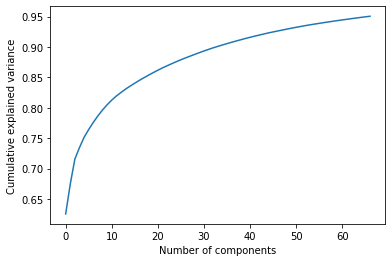

In [52]:
# Choosing the number of components (Features)
# Use PCA to get the list of features and plot which features have the most explanatory power, 
# or have the most variance.

#Create a PCA that will retain 95% of the variance
pca = PCA(0.95).fit(X)

#Create a PCA that will retain 90% of the variance
# pca = PCA(0.90).fit(X)

#Conduct PCA (apply scaling on feature data)
X_dr = pca.transform(X)
print("Best number of components (features) after reduction : ",X_dr.shape[1]) # 67

# Visualize (Plot)
# The cumulative explained variance ratio as a function of the number of components.
#(the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

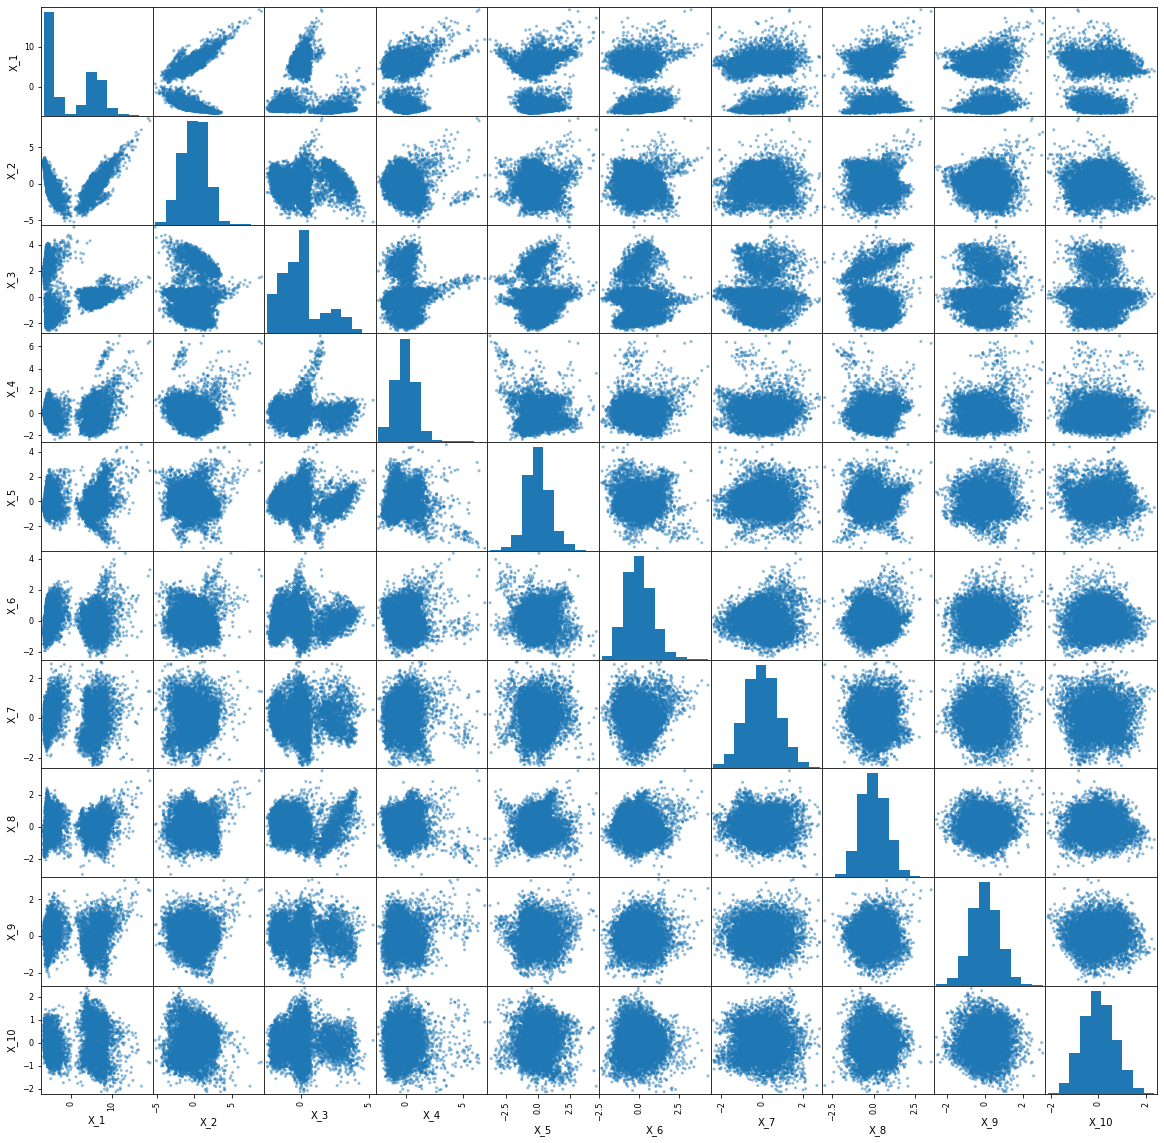

In [32]:
# Plotting only the first 10 features after Dimensionality Rediction (from 561 features to 67 features)
features_dr = ['X_{}'.format(i+1) for i in range(len(X_dr[0]))]
index_dr = range(len(X_dr))
PD_Data_dr = pd.DataFrame(X_dr, index_dr, features_dr)
pd.plotting.scatter_matrix(PD_Data_dr.iloc[:,0:10], figsize=(20, 20))
plt.show()

### Testing Data

In [53]:
X_test_dr = pca.transform(X_test)
print("Test Data shape : ",X_test_dr.shape) #(2947, 67)

Test Data shape :  (2947, 67)


## Classification Process (using the 4 classifiers):

### K-Neighbors Classifier ( KNeighborsClassifier )

#### Training

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_before = np.datetime64(datetime.datetime.now())
knn.fit(X, t)
knn_after = np.datetime64(datetime.datetime.now())

In [86]:
knn_diff = (knn_after - knn_before)
print(knn_diff)

236209 microseconds


#### Testing

In [87]:
y_predicted = np.array(knn.predict(X_test), dtype=int)
acc = knn.score(X_test, y_actual) * 100
print('Accuracy', acc, '%')

Accuracy 90.15948422124194 %


#### Training (Dimensionality Reduction)

In [114]:
knn_dr = KNeighborsClassifier(n_neighbors=5)

knn_dr_before = np.datetime64(datetime.datetime.now())
knn_dr.fit(X_dr, t)
knn_dr_after = np.datetime64(datetime.datetime.now())

In [115]:
knn_dr_diff = (knn_dr_after - knn_dr_before)
print(knn_dr_diff)

19388 microseconds


#### Testing (Dimensionality Reduction)

In [116]:
y_predicted_dr = np.array(knn_dr.predict(X_test_dr), dtype=int)
acc = knn_dr.score(X_test_dr, y_actual) * 100
print('Accuracy', acc, '%')

Accuracy 89.34509670851713 %


### K-Nearest Keigbors Classifier (from scratch)

#### Using the K-Nearest Neigbors technique with majority voting to classify the data.

- Take the maximum k value as input (M) and find the best k that minimize the error by validate each k from 1 to (M). 
- Take the (L) as parameter which used to make a k-fold cross-validation (don't be confused butween k in KNN technique and the k in k-fold cross-validation they are different).

$$k = argmin_k(\bar{E_k})$$
where 
$$\bar{E_k} = \frac{1}{L}\sum_{l=1}^{L}E_l$$

In [109]:
class k_nearest_neighbors:
    def predict(self, X):
        if (hasattr(self, 'X') & hasattr(self, 'K') & hasattr(self, 't')):
            t_predicted = self.__predict(self.X, self.t, X, self.K)
            return t_predicted
        else:
            print('Please run fit in order to be able to use predict')
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def __predict(self, X_train, t_train, X_predict, k):
        t_predicted = np.zeros(len(X_predict))
        
        for i, x in enumerate(X_predict):
            d = np.sqrt(np.sum((X_train - x)**2, axis=1))
            d_order = np.argsort(d)
            t_train_ordered = t_train[d_order]
            knn_classes = t_train_ordered[0:k]
            t_predicted[i] = stats.mode(knn_classes).mode[0]
        
        return t_predicted
    
    def fit(self, X, t, M, L = 10):
        if (int(M) != M or M <= 0 or int(L) != L or L <= 0):
            print("The maximum number of neighbors to check ( M ) or the number of partitions ( L ) "
                  + "must be integer more than zero")
            return

        self.N = len(t)
        
        if (L > self.N):
            print("The number of partitions ( L ) can't be more than the length of the entered data")
            return
        
        if (M > self.N):
            print("The maximum number of neighbors to check ( M ) "
                  + "can't be more than the length of the entered data")
            return

        self.X = X
        self.t = t
        self.M = M
        self.L = L
        
        self.errors_mean = np.zeros(self.M)
        
        partition = int(self.N/L)
        
        for k in range(self.M):
            k += 1
            err = 0
            
            for l in range(0, self.N, partition):
                X_training = np.append(self.X[0:l,:], self.X[l+partition:self.N,:], axis=0)
                t_training = np.append(self.t[0:l], self.t[l+partition:self.N], axis=0)
                
                X_validation = self.X[l:l+partition,:]
                t_validation = self.t[l:l+partition]
                
                t_predected = self.__predict(X_training, t_training, X_validation, k)
                
                err += np.mean(t_predected != t_validation)
                
            self.errors_mean[k-1] = err / L
            
        self.K = np.argmin(self.errors_mean) + 1
        
        print('Best K in the selected range (from 1 to {}) is {}'.format(self.M, self.K))

#### Training

In [90]:
knn2 = k_nearest_neighbors()

knn2_before = np.datetime64(datetime.datetime.now())
knn2.fit(X, t, 5)
knn2_after = np.datetime64(datetime.datetime.now())

Best K in the selected range (from 1 to 5) is 5


In [91]:
knn2_diff = (knn2_after - knn2_before)
print(knn2_diff)

1535646884 microseconds


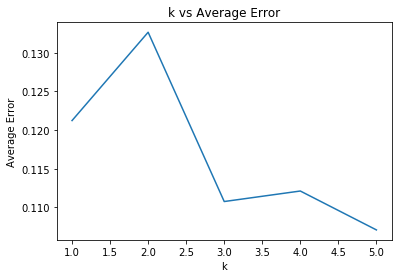

In [31]:
plt.plot(range(1,6), knn2.errors_mean)
plt.xlabel('k')
plt.ylabel('Average Error')
plt.title('k vs Average Error')
plt.show()

#### Testing

In [92]:
y_predicted = np.array(knn2.predict(X_test), dtype=int)
acc = knn2.accuracy(y_predicted, y_actual)

print('Accuracy', acc, '%')

Accuracy 90.15948422124194 %


#### Training (Dimensionality Reduction)

In [110]:
knn2_dr = k_nearest_neighbors()

knn2_dr_before = np.datetime64(datetime.datetime.now())
knn2_dr.fit(X_dr, t, 5)
knn2_dr_after = np.datetime64(datetime.datetime.now())

Best K in the selected range (from 1 to 5) is 5


In [111]:
knn2_dr_diff = (knn2_dr_after - knn2_dr_before)
print(knn2_dr_diff)

82625113 microseconds


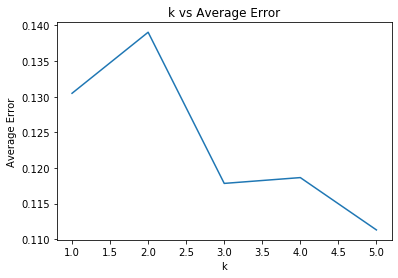

In [112]:
plt.plot(range(1,6), knn2_dr.errors_mean)
plt.xlabel('k')
plt.ylabel('Average Error')
plt.title('k vs Average Error')
plt.show()

#### Testing (Dimensionality Reduction)

In [113]:
y_predicted_dr = np.array(knn2_dr.predict(X_test_dr), dtype=int)
acc = knn2_dr.accuracy(y_predicted_dr, y_actual)

print('Accuracy', acc, '%')

Accuracy 89.34509670851713 %


### Gaussian Naive Bayes ( GaussianNB )

#### Training

In [96]:
gnb = GaussianNB()

gnb_before = np.datetime64(datetime.datetime.now())
gnb.fit(X, t)
gnb_after = np.datetime64(datetime.datetime.now())

In [97]:
gnb_diff = (gnb_after - gnb_before)
print(gnb_diff)

196015 microseconds


#### Testing

In [98]:
y_predicted = np.array(gnb.predict(X_test), dtype=int)
acc = gnb.score(X_test, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 77.02748557855446 %


#### Training (Dimensionality Reduction)

In [105]:
gnb_dr = GaussianNB()

gnb_dr_before = np.datetime64(datetime.datetime.now())
gnb_dr.fit(X_dr, t)
gnb_dr_after = np.datetime64(datetime.datetime.now())

In [106]:
gnb_dr_diff = (gnb_dr_after - gnb_dr_before)
print(gnb_dr_diff)

11937 microseconds


#### Testing (Dimensionality Reduction)

In [107]:
y_predicted_dr = np.array(gnb_dr.predict(X_test_dr), dtype=int)
acc = gnb_dr.score(X_test_dr, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 87.68238887003733 %


### Gaussian Naive Bayes Classifier (from scratch)

In [34]:
class gaussian_naive_bayes:
    def __mean(self, c):
        return np.mean(self.X[self.t == c], axis=0)
        
    def __variance(self, c):
        return np.var(self.X[self.t == c], axis=0)
        
    def predict(self, X):
        if (hasattr(self, 'classes_data') & hasattr(self, 'classes') & hasattr(self, 'N')):
            g = np.zeros((len(X), len(self.classes)), dtype=np.float128)
            for i, c in enumerate(self.classes):
                class_data = self.classes_data[c]
                portion = (class_data['n'] / self.N)
                exponent = np.exp(-(X-class_data['mean'])**2 / (2* class_data['var']))
                denominator = np.sqrt(2 * np.pi * class_data['var'])
                g[:, i] = np.prod((1 / denominator) * exponent, axis=1, dtype=np.float128) * portion
            a = self.classes[np.argmax(g, axis=1)]
            return a
        else:
            print('Please run fit in order to be able to use predict')
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def fit(self, X, t):
        self.X = np.array(X)
        self.t = np.array(t)
        
        self.N = len(t)

        self.classes = np.sort(np.unique(t))
        
        self.classes_data = {}
        
        for c in self.classes:
            self.classes_data[c] = {'mean': self.__mean(c),
                                    'var': self.__variance(c),
                                    'n': len(self.X[self.t == c])}

#### Training

In [35]:
gnb2 = gaussian_naive_bayes()

gnb2_before = np.datetime64(datetime.datetime.now())
gnb2.fit(X, t)
gnb2_after = np.datetime64(datetime.datetime.now())

In [36]:
gnb2_diff = (gnb2_after - gnb2_before)
print(gnb2_diff)

142538 microseconds


#### Testing

In [37]:
y_predicted = np.array(gnb2.predict(X_test))
acc = gnb2.accuracy(y_predicted, y_actual)

print('Accuracy', acc, '%')

Accuracy 76.99355276552427 %


#### Training (Dimensionality Reduction)

In [102]:
gnb2_dr = gaussian_naive_bayes()

gnb2_dr_before = np.datetime64(datetime.datetime.now())
gnb2_dr.fit(X_dr, t)
gnb2_dr_after = np.datetime64(datetime.datetime.now())

In [103]:
gnb2_dr_diff = (gnb2_after - gnb2_before)
print(gnb2_dr_diff)

142538 microseconds


#### Testing (Dimensionality Reduction)

In [104]:
y_predicted_dr = np.array(gnb2_dr.predict(X_test_dr))
acc = gnb2_dr.accuracy(y_predicted_dr, y_actual)

print('Accuracy', acc, '%')

Accuracy 87.68238887003733 %


### Perceptron Classifier ( Perceptron )

#### Training

In [39]:
per = Perceptron(tol=1e-3, random_state=0)

per_before = np.datetime64(datetime.datetime.now())
per.fit(X, t)
per_after = np.datetime64(datetime.datetime.now())

In [40]:
per_diff = (per_after - per_before)
print(per_diff)

642555 microseconds


#### Testing

In [41]:
y_predicted = np.array(per.predict(X_test), dtype=int)
acc = per.score(X_test, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 94.84221241940956 %


#### Training (Dimensionality Reduction)

In [54]:
per_dr = Perceptron(tol=1e-3, random_state=0)

per_dr_before = np.datetime64(datetime.datetime.now())
per_dr.fit(X_dr, t)
per_dr_after = np.datetime64(datetime.datetime.now())

In [55]:
per_dr_diff = (per_dr_after - per_dr_before)
print(per_dr_diff)

174157 microseconds


#### Testing (Dimensionality Reduction)

In [56]:
y_predicted_dr = np.array(per_dr.predict(X_test_dr), dtype=int)
acc = per_dr.score(X_test_dr, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 92.84017645062775 %


### Perceptron (from scratch)

In [46]:
class perceptron:
    # miss classified method that generates a vector of indexes of the miss classified points
    def __miss_classified(C,W_initial):
        L=[True]*len(C)
        t=C[0,-1]
        for i in range(len(C)):
            if C[i,:-1]@ W_initial*t < 0:
                L[i]=False
        indices=[j for j, x in enumerate(L) if x == False]
        return indices
    
    # Create adjust weigth method
    def __adjust_weigth(C,W_initial):
        W=W_initial+eta*C[:-1]*C[-1]
        return W
    
    # Stopping criteria method that stops adjusting weigths when achieving the optimal weigths 
    def __Stopping_Criteria(C,Wnew):
        t=C[-1]
        if C[:-1]@Wnew*t >0:
            return True
        else:
            return False
        
    def fit(X, t):
        W_initial=np.random.rand(562)
        eta=0.1
        indx_C1=self.__miss_classified(C1,W_initial) #index of miss-classified points of Class 1
        indx_C2=self.__miss_classified(C2,W_initial) #index of miss-classified points of Class 2
        # miss classified points in C1
        print(len(indx_C1))
        # miss classified points in C2
        print(len(indx_C2))
        
        # adjst weighs for miss classified points
        while(indx_C1 or indx_C2):
            for i in indx_C1:
                T=True
                while(T):
                    Wnew=self.__adjust_weigth(C1[i,:],W_initial)
                    Otp=self.__Stopping_Criteria(C1[i,:],Wnew)   
                    T=not(Otp)
                    W_initial=Wnew

            for i in indx_C1:
                T=True
                while(T):
                    Wnew=self.__adjust_weigth(C1[i,:],W_initial)
                    Otp=self.__Stopping_Criteria(C1[i,:],Wnew)   
                    T=not(Otp)
                    W_initial=Wnew

        print(W_initial)

### Multi-layer Perceptron Classifier ( MLPClassifier )

#### Training

In [99]:
mlp = MLPClassifier(learning_rate_init=0.01, max_iter=100)

mlp_before = np.datetime64(datetime.datetime.now())
mlp.fit(X, t)
mlp_after = np.datetime64(datetime.datetime.now())

In [100]:
mlp_diff = (mlp_after - mlp_before)
print(mlp_diff)

12326516 microseconds


#### Testing

In [101]:
y_predicted = np.array(mlp.predict(X_test), dtype=int)
acc = mlp.score(X_test, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 93.41703427214117 %


#### Training (Dimensionality Reduction)

In [91]:
mlp_dr = MLPClassifier(learning_rate_init=0.01, max_iter=100)

mlp_dr_before = np.datetime64(datetime.datetime.now())
mlp_dr.fit(X_dr, t)
mlp_dr_after = np.datetime64(datetime.datetime.now())

In [92]:
mlp_dr_diff = (mlp_dr_after - mlp_dr_before)
print(mlp_dr_diff)

1788925 microseconds


#### Testing (Dimensionality Reduction)

In [93]:
y_predicted_dr = np.array(mlp_dr.predict(X_test_dr), dtype=int)
acc = mlp_dr.score(X_test_dr, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 93.75636240244316 %


### Random Forest Classifier ( RandomForestClassifier )

#### Training

In [114]:
rf = RandomForestClassifier(max_depth=12, random_state=0, n_estimators=10)

rf_before = np.datetime64(datetime.datetime.now())
rf.fit(X, t)
rf_after = np.datetime64(datetime.datetime.now())

In [115]:
rf_diff = (rf_after - rf_before)
print(rf_diff)

1078599 microseconds


#### Testing

In [116]:
y_predicted = np.array(rf.predict(X_test), dtype=int)
acc = rf.score(X_test, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 91.38106549032915 %


#### Training (Dimensionality Reduction)

In [79]:
rf_dr = RandomForestClassifier(max_depth=12, random_state=0, n_estimators=10)

rf_dr_before = np.datetime64(datetime.datetime.now())
rf_dr.fit(X_dr, t)
rf_dr_after = np.datetime64(datetime.datetime.now())

In [80]:
rf_dr_diff = (rf_dr_after - rf_dr_before)
print(rf_dr_diff)

459523 microseconds


#### Testing (Dimensionality Reduction)

In [81]:
y_predicted_dr = np.array(rf_dr.predict(X_test_dr), dtype=int)
acc = rf_dr.score(X_test_dr, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 86.12147947064813 %


### Support Vector Classification ( SVC )

#### Training

In [19]:
svc = SVC(kernel = 'linear', C = 6)

svc_before = np.datetime64(datetime.datetime.now())
svc.fit(X, t)
svc_after = np.datetime64(datetime.datetime.now())

In [20]:
svc_diff = (svc_after - svc_before)
print(svc_diff)

2153486 microseconds


#### Testing

In [11]:
y_predicted = np.array(svc.predict(X_test), dtype=int)
acc = svc.score(X_test, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 96.33525619273838 %


#### Training (Dimensionality Reduction)

In [76]:
svc_dr = SVC(kernel = 'linear', C = 6)

svc_dr_before = np.datetime64(datetime.datetime.now())
svc_dr.fit(X_dr, t)
svc_dr_after = np.datetime64(datetime.datetime.now())

In [77]:
svc_dr_diff = (svc_dr_after - svc_dr_before)
print(svc_dr_diff)

787979 microseconds


#### Testing (Dimensionality Reduction)

In [78]:
y_predicted_dr = np.array(svc_dr.predict(X_test_dr), dtype=int)
acc = svc_dr.score(X_test_dr, y_actual) * 100

print('Accuracy', acc, '%')

Accuracy 93.17950458092976 %


## <u>Conclusion:</u>
- Support Vector Classifier has the highest accuracy reslts for both original data & data after reduction.
- Both Gaussian Naive Bayes (from scratch) & Gaussian Naive Bayes Classifier have the lowest accuracy results for both original data & data after reduction.
- Both Gaussian Naive Bayes Classifiers perform better after reduction.  
- Naive Bayes was the fastest classifie for both original data & data after reduction.
- K-Nearest Neigbors was the slowest classifie for both original data & data after reduction.
- Using a PCA that will retain **90%** of the variance instead of **95%** of variance causes the classifiers to run faster but with lower accuracy for the data with reduced features.

### Conclusion Table Results (PCA = 95%)
A PCA that will retain 95% of the variance

|                                   | Accuracy %      |                         |                   | Time (microseconds) |                          |               |
|:---------------------------------:|-----------------|-------------------------|-------------------|---------------------|--------------------------|---------------|
| Classifiers used                  | Original   Data | Features   Reduced Data | Accuracy   Change | Original   Data2    | Features   Reduced Data2 | Time   Change |
| K-Neighbors Classifier            | 90.16%          | 89.35%                  | ↓                 | 201,062             | 23,120                   | ↓             |
| K-Nearest Neigbors (from scratch) | 90.16%          | 89.35%                  | ↓                 | 1,516,665,809       | 197,418,169              | ↓             |
| Gaussian Naive Bayes             | 77.03%          | 87.68%                  | ↑                 | 155,810             | 14,074                   | ↓             |
| Gaussian Naive Bayes (from scratch) | 76.99%          | 87.68%                  | ↑                 | 251,305             | 251,305                  | ≈             |
| Perceptron Classifier         | 94.84%          | 92.84%                  | ↓                 | 642,555          | 154,171                | ↓             |
| Perceptron Classifier (from scratch)  | -----          | -----                  | --                 | ------          | ------                | --             |
| Multi-layer Perceptron Classifier | 93.89%          | 93.82%                  | ≈                 | 10,954,586          | 2,028,471                | ↓             |
| Random Forest   Classifier        | 91.38%          | 86.12%                  | ↓                 | 1,005,197           | 441,285                  | ↓             |
| Support Vector  Classifier        | 96.33%          | 93.18%                  | ↓                 | 2,153,486           | 710,616                  | ↓             |

### Conclusion Table Results (PCA = 90%)
A PCA that will retain 90% of the variance

|                                     | Accuracy %      |                         |                   | Time (microseconds) |                          |               |
|:-----------------------------------:|-----------------|-------------------------|-------------------|---------------------|--------------------------|---------------|
| Classifiers used                    | Original   Data | Features   Reduced Data | Accuracy   Change | Original   Data2    | Features   Reduced Data2 | Time   Change |
|       K-Neighbors   Classifier      |      90.16%     |          87.61%         |         ↓         |       236,209       |          23,120          |       ↓       |
|   K-Nearest Neigbors (from scratch) |      90.16%     |          87.61%         |         ↓         |    1,535,646,884    |        115,201,484       |       ↓       |
|  Gaussian Naive Bayes             |      77.03%     |          86.83%         |         ↑         |       196,015       |          29,151          |       ↓       |
| Gaussian Naive Bayes (from scratch) |      76.99%     |          86.83%         |         ↑         |       164,839       |          164,839         |       ≈       |
| Perceptron Classifier         | 94.84%          | 90.19%                  | ↓                 | 642,555          | 94,810                | ↓             |
| Perceptron Classifier (from scratch)  | -----          | -----                  | --                 | ------          | ------                | --             |
| Multi-layer   Perceptron Classifier |      93.72%     |          91.01%         |         ↓         |      11,313,579     |         2,496,909        |       ↓       |
|      Random Forest   Classifier     |      91.38%     |          85.99%         |         ↓         |      1,078,599      |          288,493         |       ↓       |
| Support  Vector  Classifier         | 96.33%          | 90.16%                  | ↓                 | 2,153,486           | 558,805                  | ↓             |

### Comparison chart between Classifiers

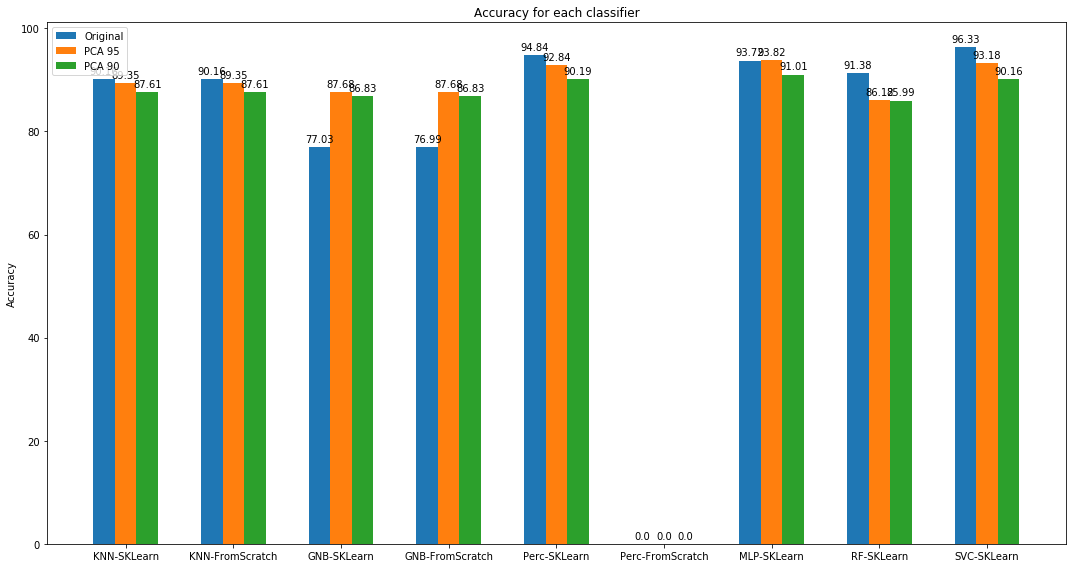

In [118]:
labels = ['KNN-SKLearn', 'KNN-FromScratch', 'GNB-SKLearn', 'GNB-FromScratch', 'Perc-SKLearn',
          'Perc-FromScratch', 'MLP-SKLearn', 'RF-SKLearn', 'SVC-SKLearn']
original_acc = [90.16, 90.16, 77.03, 76.99, 94.84, 0, 93.72, 91.38, 96.33]
pca_95_acc = [89.35, 89.35, 87.68, 87.68, 92.84, 0, 93.82, 86.12, 93.18]
pca_90_acc = [87.61, 87.61, 86.83, 86.83, 90.19, 0, 91.01, 85.99, 90.16]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, original_acc, width, label='Original')
rects2 = ax.bar(x, pca_95_acc, width, label='PCA 95')
rects3 = ax.bar(x + width, pca_90_acc, width, label='PCA 90')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for each classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()